In [70]:
# Importing all libraries required.
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set it to convert scientific values
pd.options.display.float_format = '{:.2f}'.format 

# Regular expressions for string manipulation
import re

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

# to print versions of packages
#!pip install print-versions # works for python >= 3.8
from print_versions import print_versions

# versions
import sys
import platform


#import zipfile module for taking the loan.csv
from zipfile import ZipFile

#installed pip install zipfile36
import zipfile36
import io



In [71]:

print(platform.python_version())
print_versions(globals())


3.10.5
pandas==2.2.2
numpy==2.0.2
seaborn==0.13.2
re==2.2.1
platform==1.0.8
zipfile36==0.1.3
matplotlib==3.9.4


In [72]:
# Load file directly from the upgrad site and unzipping to a dataframe
loandf = pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/3ba74fb7-bd88-4854-8597-1c225a5aed99/loan.zip',compression='zip')


In [73]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [74]:
# Checking for duplicated rows in data
loandf[loandf.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [75]:
#Finding the Null columns and rows

print("Null Rows", loandf.isnull().all(axis=1).sum())
print("Null Columns", loandf.isnull().all(axis=0).sum())


Null Rows 0
Null Columns 54


In [76]:
#Dropping the full Null columns

loandf.dropna(axis=1,how='all',inplace=True)
loandf.shape

(39717, 57)

In [77]:
loandf.isna().sum()
# Finding columns that have null
loandf.columns[loandf.isnull().any()]

Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [78]:
#Loading all non Null columns to a new dataframe - loandf1
loandf1=loandf.dropna(axis=1,how='any')

In [79]:
loandf1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,acc_now_delinq,delinq_amnt
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,171.62,1,INDIVIDUAL,0,0
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,119.66,1,INDIVIDUAL,0,0
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,649.91,1,INDIVIDUAL,0,0
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,357.48,1,INDIVIDUAL,0,0
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,67.79,1,INDIVIDUAL,0,0


In [80]:
#resorting index
loandf1 = loandf1.reindex(sorted(loandf1.columns), axis=1)
loandf1

,acc_now_delinq,addr_state,annual_inc,application_type,collection_recovery_fee,delinq_2yrs,delinq_amnt,dti,earliest_cr_line,funded_amnt,...,term,total_acc,total_pymnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp,url,verification_status,zip_code
0,0,AZ,24000.00,INDIVIDUAL,0.00,0,0,27.65,Jan-85,5000,...,36 months,9,5863.16,5833.84,863.16,0.00,5000.00,https://lendingclub.com/browse/loanDetail.acti...,Verified,860xx
1,0,GA,30000.00,INDIVIDUAL,1.11,0,0,1.00,Apr-99,2500,...,60 months,4,1008.71,1008.71,435.17,0.00,456.46,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,309xx
2,0,IL,12252.00,INDIVIDUAL,0.00,0,0,8.72,Nov-01,2400,...,36 months,10,3005.67,3005.67,605.67,0.00,2400.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,606xx
3,0,CA,49200.00,INDIVIDUAL,0.00,0,0,20.00,Feb-96,10000,...,36 months,37,12231.89,12231.89,2214.92,16.97,10000.00,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,917xx
4,0,OR,80000.00,INDIVIDUAL,0.00,0,0,17.94,Jan-96,3000,...,60 months,38,3513.33,3513.33,1037.39,0.00,2475.94,https://lendingclub.com/browse/loanDetail.acti...,Source Verified,972xx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0,CO,110000.00,INDIVIDUAL,0.00,0,0,11.33,Nov-90,2500,...,36 months,40,2822.97,1213.88,322.97,0.00,2500.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,802xx
39713,0,NC,18000.00,INDIVIDUAL,0.00,1,0,6.40,Dec-86,8500,...,36 months,9,9913.49,1020.51,1413.49,0.00,8500.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,274xx
39714,0,MA,100000.00,INDIVIDUAL,0.00,0,0,2.30,Oct-98,5000,...,36 months,20,5272.16,1397.12,272.16,0.00,5000.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,017xx
39715,0,MD,200000.00,INDIVIDUAL,0.00,0,0,3.72,Nov-88,5000,...,36 months,26,5174.20,672.66,174.20,0.00,5000.00,https://lendingclub.com/browse/loanDetail.acti...,Not Verified,208xx


In [81]:
#Converting debt to income (dti), funded amount (funded_amnt), funded amount investor (funded_amnt_inv) and loan amount (loan_amnt) to float.
loandf1 = loandf1.astype({
    'dti': 'float',
    'funded_amnt' : 'float',
    'funded_amnt_inv' : 'float',
    'loan_amnt' : 'float'
})

In [82]:
# Converting "term" column to int
loandf1['term'] = loandf1['term'].apply(lambda x: int(x.replace('months', '').strip()))


In [83]:
#Converting loan date (issue_d) to DateTime (format: yyyy-mm-dd)
loandf1['issue_d'] = pd.to_datetime(loandf1['issue_d'], format = '%b-%y')

In [84]:
# Converting int_rate column to float 
loandf1['int_rate'] = loandf1['int_rate'].apply(lambda x: float(x.replace('%', '').strip()))


In [85]:
# Rounding the columns to two decimal places
for col in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    loandf1[col] = loandf1[col].apply(lambda x: round(x, 2))


In [86]:
loandf1.dtypes

acc_now_delinq                      int64
addr_state                         object
annual_inc                        float64
application_type                   object
collection_recovery_fee           float64
delinq_2yrs                         int64
delinq_amnt                         int64
dti                               float64
earliest_cr_line                   object
funded_amnt                       float64
funded_amnt_inv                   float64
grade                              object
home_ownership                     object
id                                  int64
initial_list_status                object
inq_last_6mths                      int64
installment                       float64
int_rate                          float64
issue_d                    datetime64[ns]
last_pymnt_amnt                   float64
loan_amnt                         float64
loan_status                        object
member_id                           int64
open_acc                          

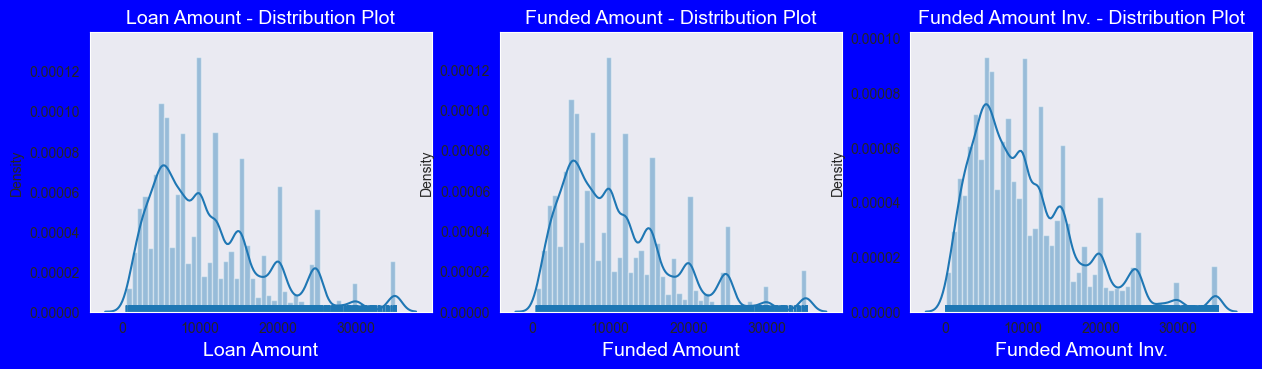

In [87]:
# Distribution of three loan amount fields using distribution plot.

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.distplot(loandf1['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.distplot(loandf1['funded_amnt'],rug = True)
ax.set_title('Funded Amount - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.distplot(loandf1['funded_amnt_inv'],rug = True)
ax.set_title('Funded Amount Inv. - Distribution Plot',fontsize=14,color='w')
ax.set_xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

# Observation: 
# Distribution of amounts for all three looks very much similar.
# We will work with only loan amount column for rest of our analysis.

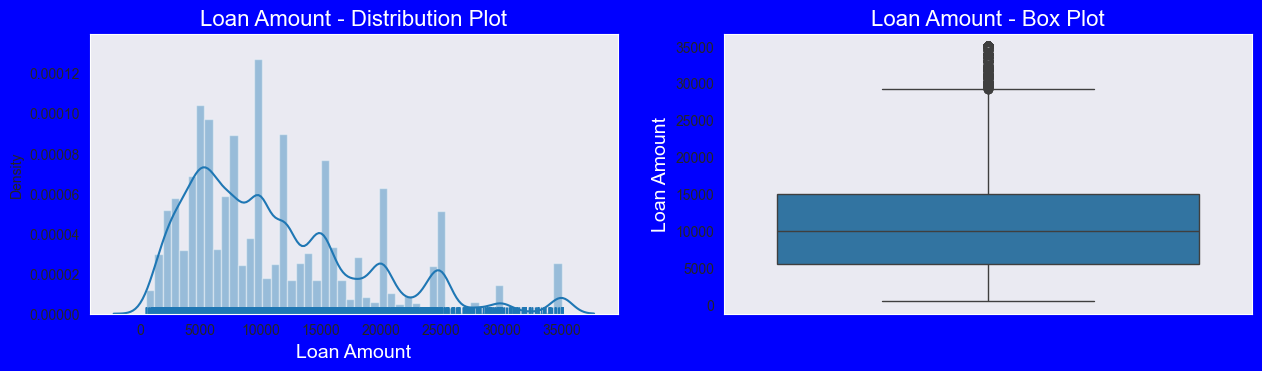

In [88]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loandf1['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Loan Amount',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loandf1['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Loan amounts are in range of 5000 - 15000

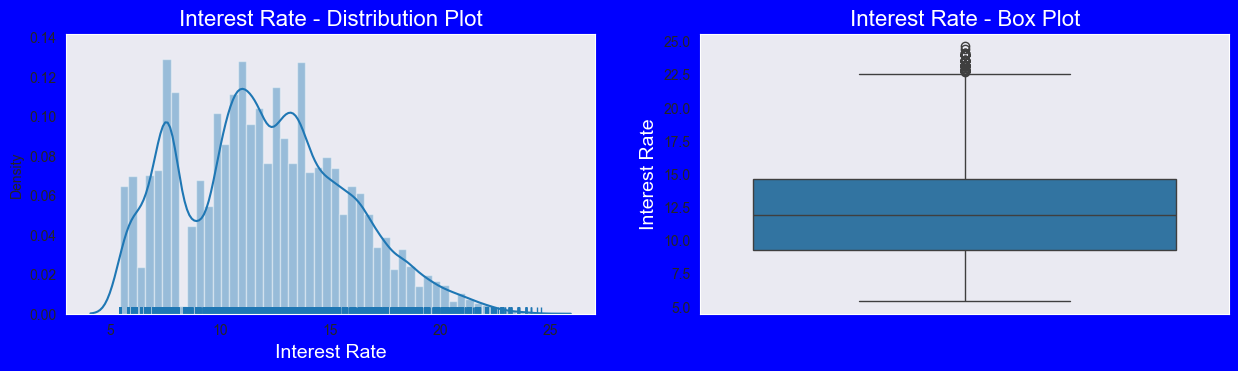

In [89]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loandf1['int_rate'],rug = True)
ax.set_title('Interest Rate - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loandf1['int_rate'])
ax.set_title('Interest Rate - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the Interest Rates on loans are in range of 10% - 15%

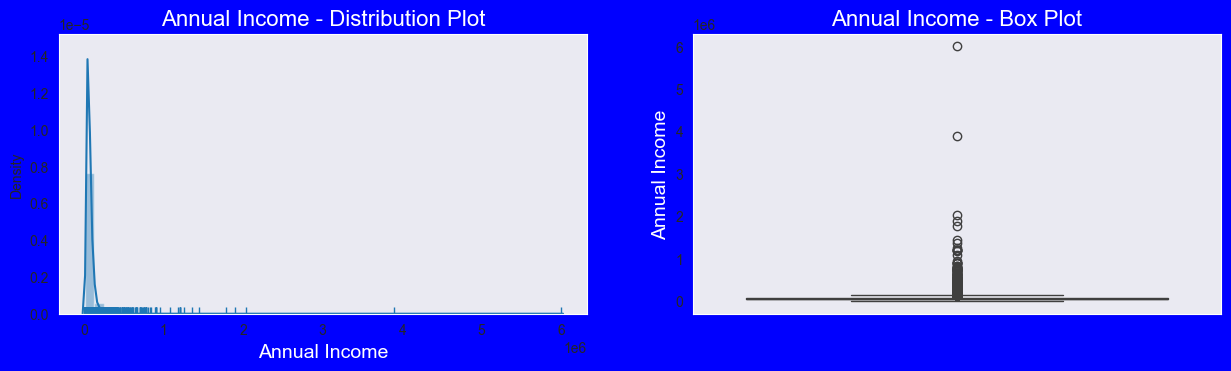

In [90]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8),facecolor='b')
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loandf1['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot',fontsize=16,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 2, 2)
plt.title('Annual Income - Box Plot')
ax = sns.boxplot(y=loandf1['annual_inc'])
ax.set_title('Annual Income - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

# Observations :
# Below plots show that most of the borrower's Annual incomes are in range of 40000- 80000

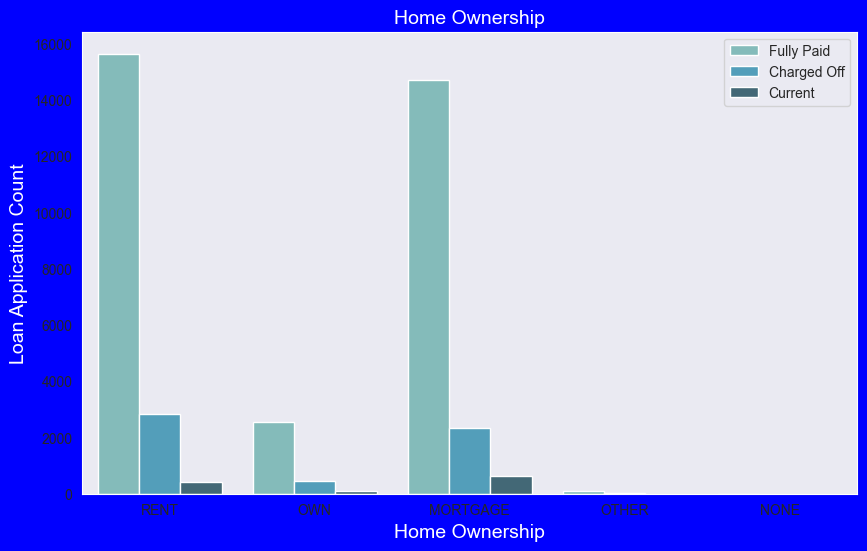

In [91]:
 #Univariate Analysis - Unordered Categorical Variables - Home Ownership

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="home_ownership",data=loandf1,hue='loan_status',palette='GnBu_d')
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('Home Ownership',fontsize=14,color='w')
ax.set_xlabel('Home Ownership',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Observations :
# Below plot shows that most of them living in rented home or mortgazed their home.
# Applicant numbers are high from these categories so charged off is high too.

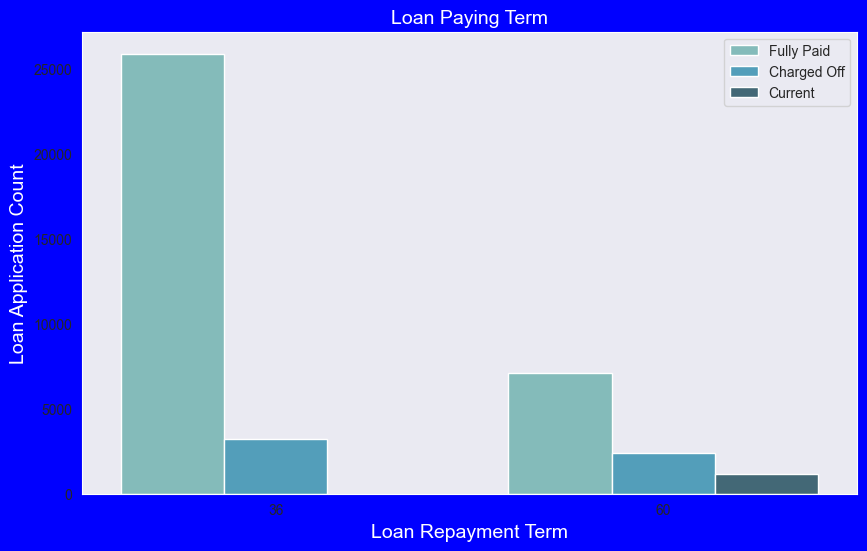

In [92]:
# Univariate Analysis - Ordered Categorical Variables- Loan Paying Term

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.countplot(x="term",data=loandf1,hue='loan_status',palette='GnBu_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

# Observations :
# Below plot shows that those who had taken loan to repay in 60 months had more % of number of applicants getting 
# charged off as compared to applicants who had taken loan for 36 months.

In [93]:
### Bivariate Analysis 
#### correlation between grade and loan_status - Loans belonging to grade D,E,F,G are considered to be high risk.


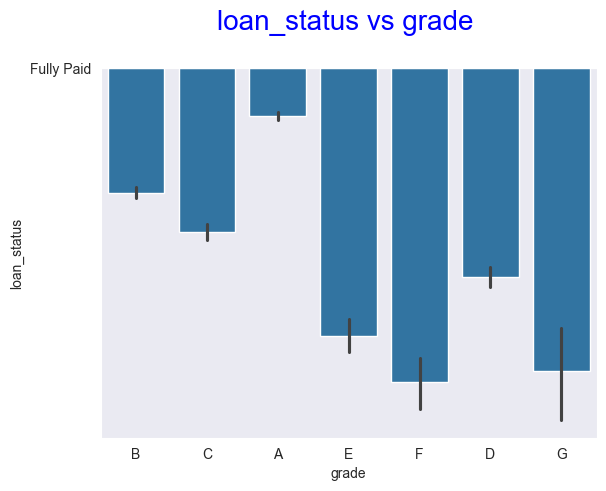

In [100]:
#Plotting a bar graph for loan_status and grade
# Update the column based on condition

#loandf1.loc[loandf1['loan_status'] == 'Fully Paid', 'loan_status'] = 1
#loandf1.loc[loandf1['loan_status'] == 'Charged Off'] = 0


#loandf1.head()
plt.title('loan_status vs grade \n', fontdict={'fontsize':20,'color':'b'})
sns.set_style('darkgrid')
sns.barplot(x=loandf1['grade'].sort_values(),y=loandf1['loan_status'])
plt.show()

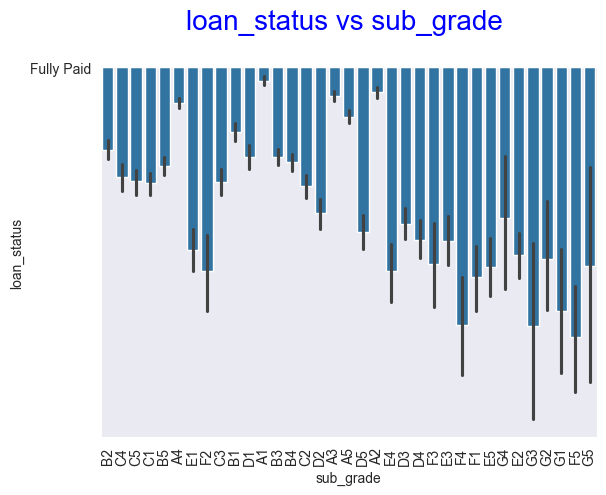

In [96]:
# plotting bar graph for loan_status and sub_grade
plt.title('loan_status vs sub_grade \n', fontdict={'fontsize':20,'color':'b'})
plt.xticks(rotation=90)
sns.barplot(x=loandf1['sub_grade'].sort_values(),y=loandf1['loan_status'])
plt.show()

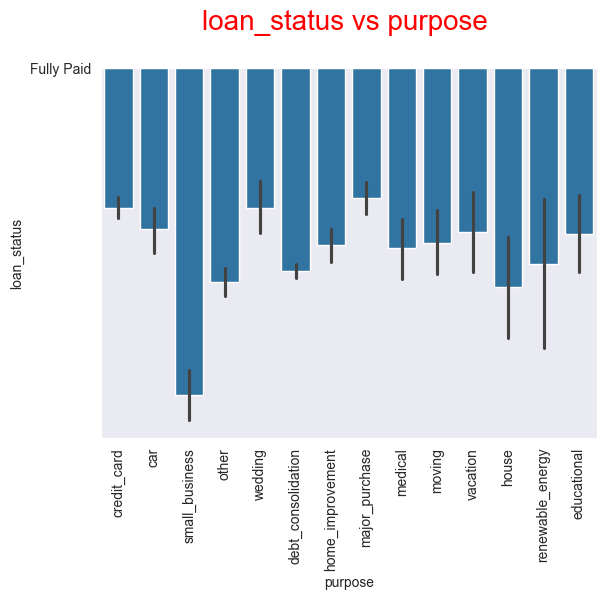

In [101]:
#here we are plotting bargraph for loan_status and purpose
plt.title('loan_status vs purpose \n', fontdict={'fontsize':20,'color':'r'})
plt.xticks(rotation=90)
sns.barplot(x=loandf1['purpose'],y=loandf1['loan_status'])
plt.show()

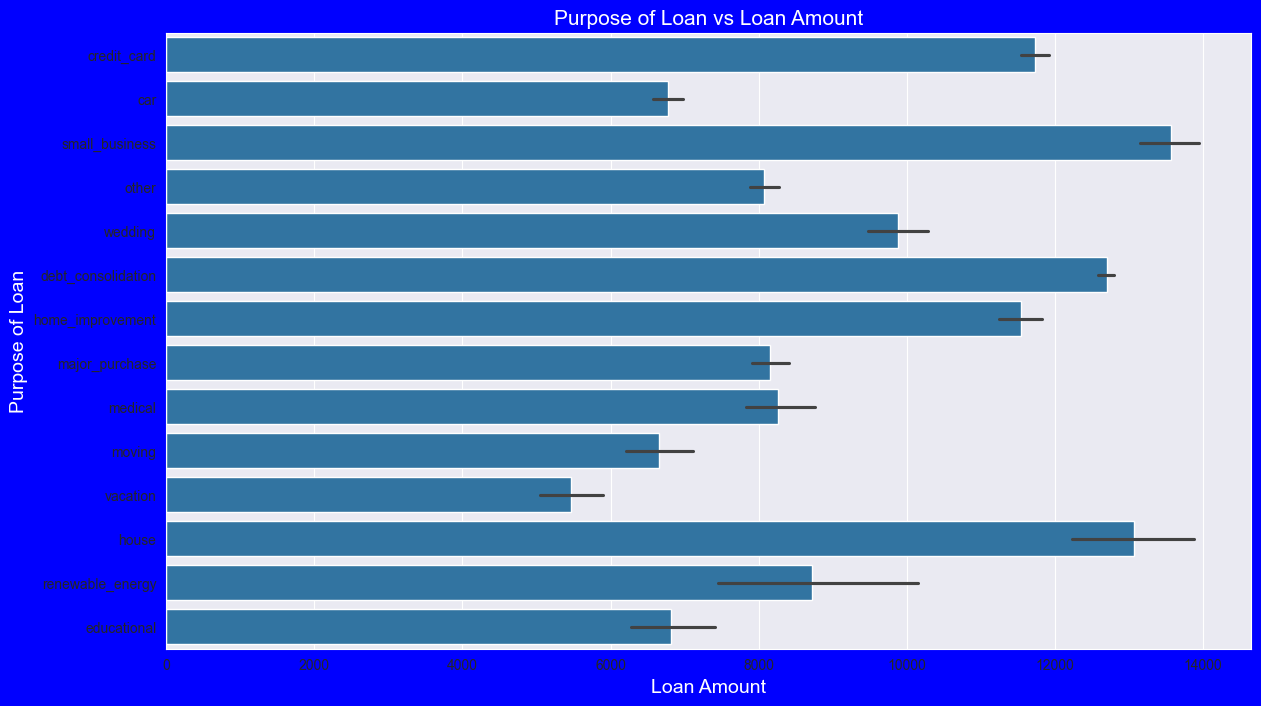

In [102]:
# Bivariate Analysis - Puprose of loan vs Loan amount
# violin Plot - It shows the distribution of quantitative data across several levels of one (or more) categorical variables 
# such that those distributions can be compared. 

plt.figure(figsize=(14,8),facecolor='b')
ax=sns.barplot(y='purpose', x='loan_amnt', data =loandf1)
ax.set_title('Purpose of Loan vs Loan Amount',fontsize=15,color='w')
ax.set_ylabel('Purpose of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()

# Observations:
# Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed
# as compare to loan taken for other purposes.

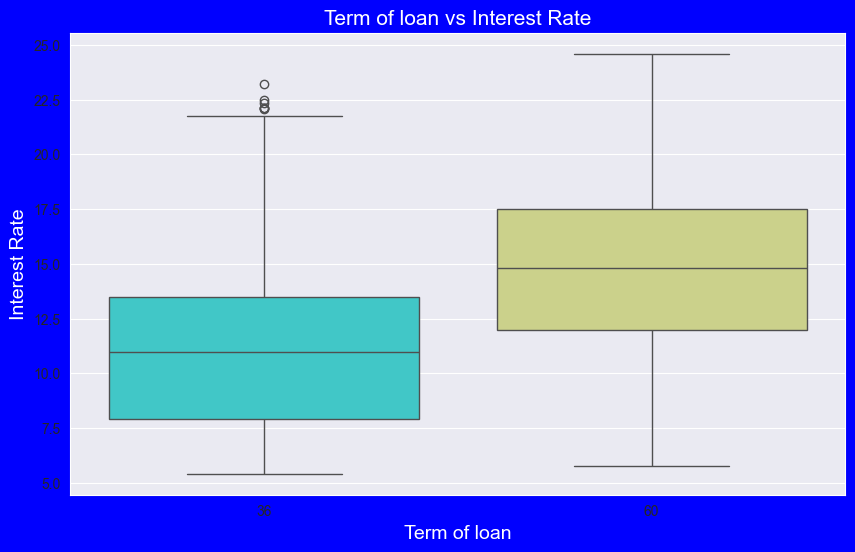

In [104]:
# Bivariate Analysis - Term of loan vs Interest Rate
# Box Plot

plt.figure(figsize=(10,6),facecolor='b')
ax = sns.boxplot(y='int_rate', x='term', data =loandf1,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'w')
ax.set_xlabel('Term of loan',fontsize=14,color = 'w')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

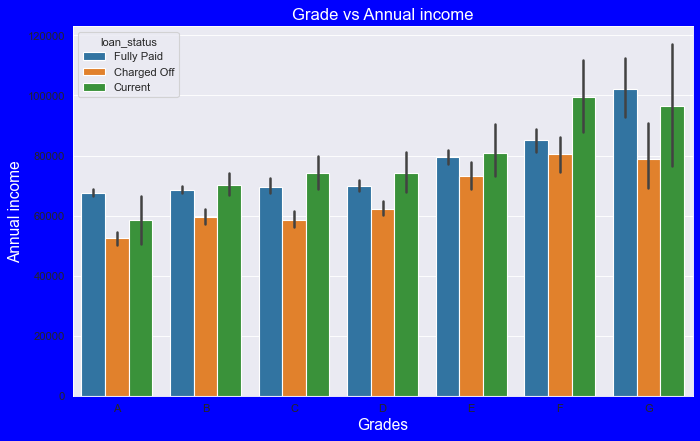

In [105]:
# Bivariate analysis
# BarPlot to show variation of annual income across grade for every loan status.

plt.figure(figsize=(10,6), dpi=80, facecolor='b', edgecolor='k')
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loandf1, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='w')
ax.set_ylabel('Annual income',fontsize=14,color = 'w')
ax.set_xlabel('Grades',fontsize=14,color = 'w')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for each and every grade (i.e. at same interest range)

In [106]:
# Select columns with non-object (numeric) data types
df_numeric = loandf1.select_dtypes(exclude=['object'])
print(df_numeric)

corr_table=df_numeric.dropna(axis=1).corr()
corr_table.dropna(how='all',inplace=True)
corr_table.dropna(how='all',axis=1,inplace=True)
print(corr_table)

       acc_now_delinq  annual_inc  collection_recovery_fee  delinq_2yrs  \
0                   0    24000.00                     0.00            0   
1                   0    30000.00                     1.11            0   
2                   0    12252.00                     0.00            0   
3                   0    49200.00                     0.00            0   
4                   0    80000.00                     0.00            0   
...               ...         ...                      ...          ...   
39712               0   110000.00                     0.00            0   
39713               0    18000.00                     0.00            1   
39714               0   100000.00                     0.00            0   
39715               0   200000.00                     0.00            0   
39716               0    22000.00                     0.00            1   

       delinq_amnt   dti  funded_amnt  funded_amnt_inv       id  \
0                0 27.65      50

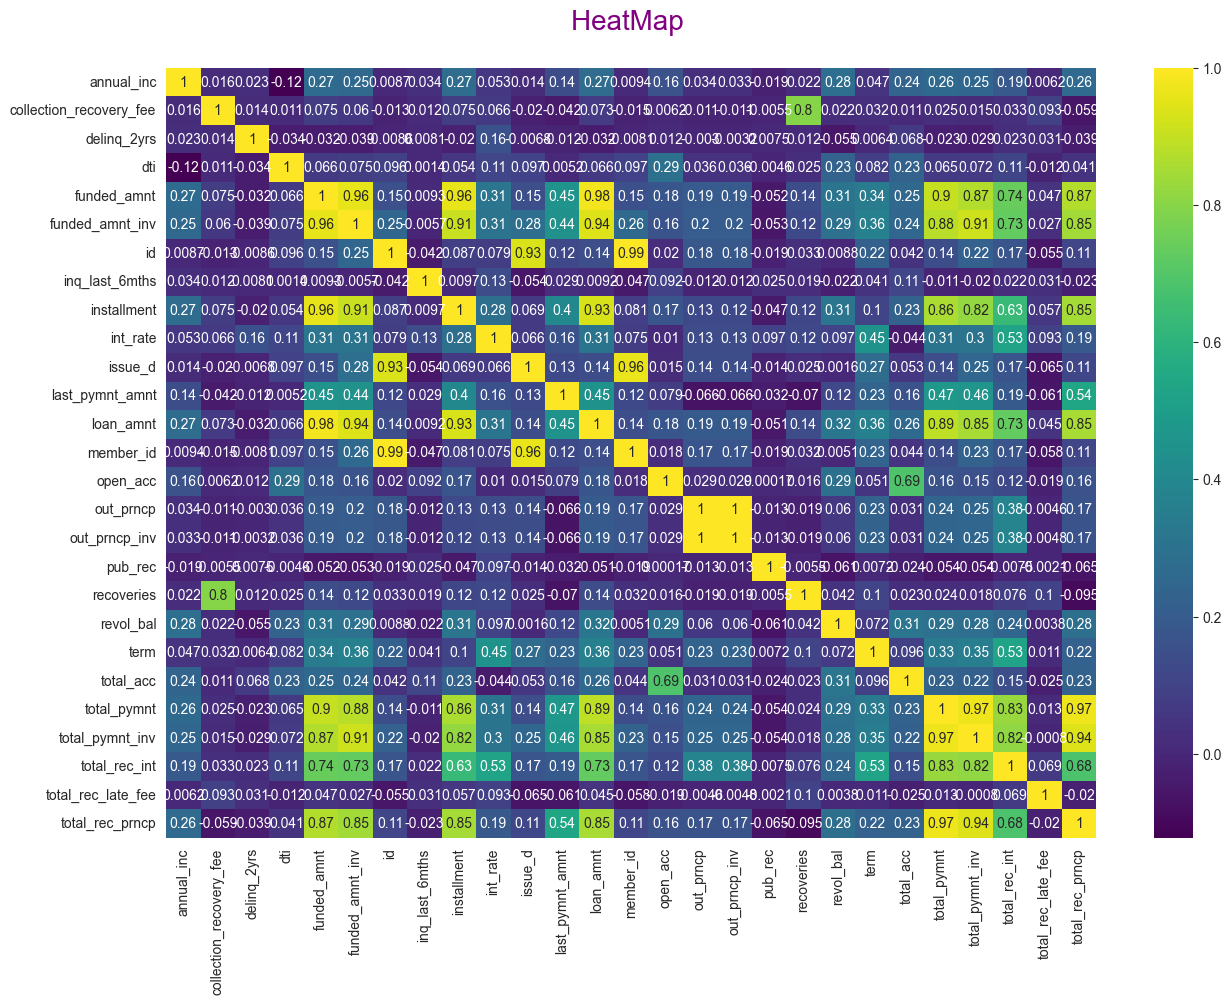

In [107]:
#here we are plotting heatmap to see linear correlation between pairs of variables
plt.figure(figsize=[15,10])
plt.title('HeatMap \n', fontdict={'fontsize':20,'color':'purple'})
sns.heatmap(corr_table,cmap='viridis', annot=True)
plt.show()